# Go To Market (G2M) insights to investment in Cab Compnay.


<b>Objective of this project:</b>

Provide actionable insights or recommendations to help a firm in identifying the right Cab company (Yellow or Pink ) for investing.
 

## Data Exploration

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cab_data = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/Cab_Data.csv")
city = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/city.csv")
Transaction_ID = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/Transaction_ID.csv")
customer_ID = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/Customer_ID.csv")
usholidays = pd.read_csv(
    "/Users/mohsenbahremani/Myfiles/Data Glacier/Week 2/USHolidays.csv")

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


"Date of Travel" needs to be changed to date format.

In [4]:
cabdate = cab_data['Date of Travel'].to_list()
startdate = pd.Timestamp('1899-12-29')
cabdates = [startdate + pd.DateOffset(x) for x in cabdate]
cab_data['Date of Travel'] = pd.to_datetime(cabdates,
                                            format='%y-%m-%d')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [5]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
city['Population']=[x.replace(',','') for x in city['Population']]
city['Population']=city['Population'].astype(int)
city['Users']=[x.replace(',','') for x in city['Users']]
city['Users']=city['Users'].astype(int)
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [7]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [8]:
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [9]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [10]:
customer_ID


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [11]:
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
usholidays

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


In [13]:
usholidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


<div class="alert alert-block alert-info">
<b>Missing Value</b> There is no missing value in our entire dataset.
</div>


<b>Merging dataset in one data frame!</b>

In [14]:
cab_data=cab_data.merge(city, how="left", on="City")

In [15]:
cab_data=cab_data.merge(Transaction_ID, how="left", on="Transaction ID")

In [16]:
cab_data=cab_data.merge(customer_ID, how="left", on="Customer ID")

In [17]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [18]:
usholidays['Date']=pd.to_datetime(usholidays['Date'])
cab_data=cab_data.merge(usholidays[['Date',"Holiday"]], how="left", left_on="Date of Travel",right_on ="Date").drop(columns = ['Date'])
cab_data.Holiday=[1 if x is not np.nan else 0 for x in cab_data.Holiday] 
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,0
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,0
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701,28712,Cash,Male,53,11242,1
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701,28020,Cash,Male,23,23327,0
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701,27182,Card,Male,33,8536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359560,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001,52392,Cash,Male,24,15651,0
359561,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001,53286,Cash,Male,32,6528,0
359562,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001,52265,Cash,Male,56,7966,0
359563,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001,52175,Card,Male,32,6423,0


<div class="alert alert-block alert-info">
<b>New Feature</b> Profit is to calculate via:cab_data['profit'] = cab_data['Price Charged'] - 	cab_data['Cost of Trip']
</div>

In [19]:
cab_data['profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

### Descriptive analysis

#### Numerical attributes

In [20]:
cab_data=cab_data.sort_values("Date of Travel").reset_index().drop("index", axis=1)

In [21]:
cab_data[['KM Travelled','Price Charged', 'Cost of Trip']].describe( )

,KM Travelled,Price Charged,Cost of Trip
count,359565.000000,359565.000000,359565.000000
mean,22.566321,423.432973,286.181027
std,12.233477,274.381119,157.994355
min,1.900000,15.600000,19.000000
25%,12.000000,206.430000,151.200000
50%,22.440000,386.350000,282.480000
75%,32.960000,583.650000,413.683200
max,48.000000,2048.030000,691.200000


In [22]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [23]:
Transaction_ID.describe(include ='all')

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


In [24]:
customer_ID.describe(include ='all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


<Figure size 576x576 with 0 Axes>

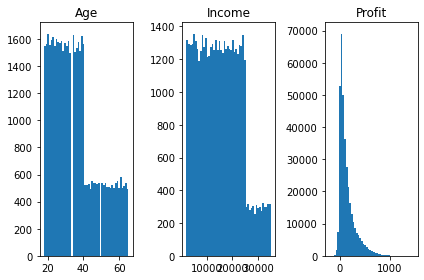

In [25]:

plt.figure(figsize=(8,8)) 
n_bins = 50
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True)
axs[0].hist(customer_ID["Age"], bins=n_bins)
axs[0].set_title("Age")
axs[1].hist(customer_ID["Income (USD/Month)"], bins=n_bins)
axs[1].set_title("Income")
axs[2].hist(cab_data['profit'], bins=n_bins)
axs[2].set_title("Profit");


#### Categorical Attributes

In [26]:
cat_var=["Company","City","Payment_Mode","Gender"]
for i in cat_var:
    print(' The Unique Value of \'{0}\' is:   {1}\n'.format(i,cab_data[i].unique()))
    

 The Unique Value of 'Company' is:   ['Yellow Cab' 'Pink Cab']

 The Unique Value of 'City' is:   ['CHICAGO IL' 'NEW YORK NY' 'SEATTLE WA' 'SACRAMENTO CA' 'PHOENIX AZ'
 'WASHINGTON DC' 'LOS ANGELES CA' 'DALLAS TX' 'SAN DIEGO CA' 'BOSTON MA'
 'SILICON VALLEY' 'MIAMI FL' 'ATLANTA GA' 'DENVER CO' 'TUCSON AZ'
 'NASHVILLE TN' 'AUSTIN TX' 'ORANGE COUNTY' 'PITTSBURGH PA']

 The Unique Value of 'Payment_Mode' is:   ['Card' 'Cash']

 The Unique Value of 'Gender' is:   ['Male' 'Female']



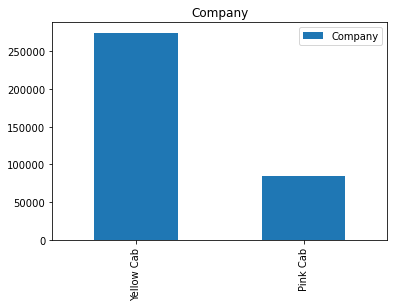

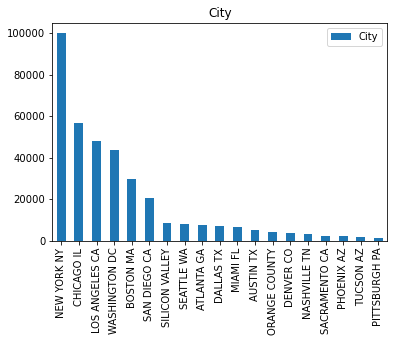

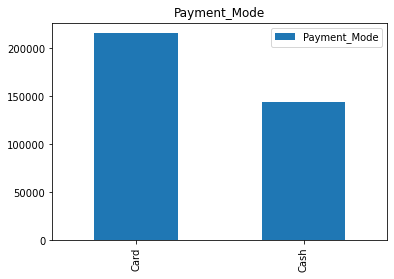

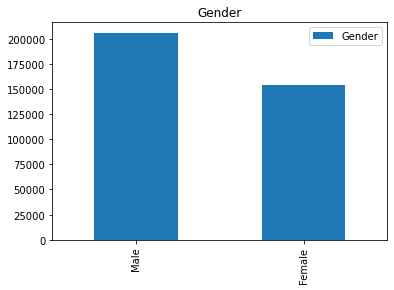

In [27]:
for i in  cat_var:
    pd.DataFrame(cab_data[i].value_counts()).plot(kind='bar', title=i)

The yellow Company has a great number of transaction compared to the pink company.

New York's citizen uses cab systems more than other cities.

Passengers normally pay by card.

Men is the majority group in using cab software.

<b>In this section, the relationship between company and covered users, rides, number of customers, and customers' income as well as age will be discussed.</b>



In [28]:
df1 = cab_data.groupby(by=['City', "Company"]).agg(no_rides=('Customer ID',
                                                             'count'))

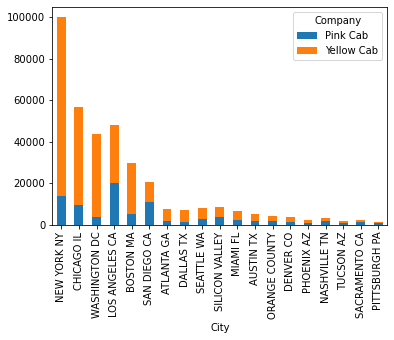

In [29]:
df1.unstack()["no_rides"].sort_values(
    'Yellow Cab', ascending=False).plot.bar(stacked=True);

It is obvious that the number of Yellow company's rides exceeds that of Pick compnay, except for 4 following cities: 

NASHVILLE TN 	
PITTSBURGH PA 	
SACRAMENTO CA 	
SAN DIEGO CA

In [30]:
df1.unstack()[df1.unstack()['no_rides']["Pink Cab"]-df1.unstack()['no_rides']["Yellow Cab"]>0]

no_rides           
Company       Pink Cab Yellow Cab
City                             
NASHVILLE TN      1841       1170
PITTSBURGH PA      682        632
SACRAMENTO CA     1336       1033
SAN DIEGO CA     10675       9819

In [31]:
df2 = cab_data.groupby(by=[ "Company"]).agg(no_customer=('Customer ID',
                                                             'nunique'),no_rides=('Customer ID',
                                                             'count'))
df2

,no_customer,no_rides
Company,,
Pink Cab,32330,84739
Yellow Cab,39896,274826


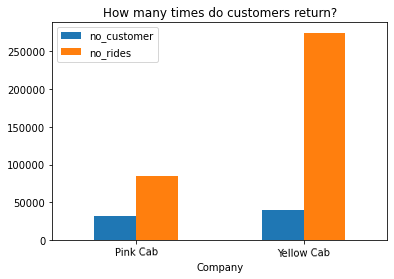

In [32]:
df2.plot.bar(rot=True, title='How many times do customers return?');

Yellow company was able to attract customers' eyes and encourage them to use its application again and again.

Yellow company ride per customer = 6.9

Pink company ride per customer = 2.6

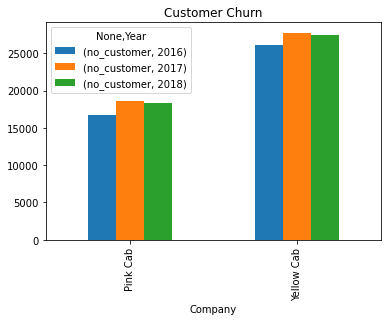

In [33]:
cab_data["Year"]=cab_data['Date of Travel'].dt.year
df_churn= cab_data.groupby(by=["Company", "Year"]).agg(no_customer=('Customer ID',
                                                                'nunique'))
df_churn.unstack().plot.bar(title="Customer Churn");

<b>Both companies ,in a same way, increased customers in 2017, but could not retain some of them in 2018. </b>

<div class="alert alert-block alert-info">
<b>Loyal Customer Rate</b>  = Number of Repeat Customers / Total Customers

</div>


In [34]:
df_repeat= cab_data.groupby(by=["Company", "Year", 'Customer ID']).size().reset_index()
df_R_10=df_repeat[df_repeat.loc[:,0]>10].set_axis(["Company", "Year", 'Customer ID', 'total_10'], axis=1)
df_R_3=df_repeat[df_repeat.loc[:,0]>3].set_axis(["Company", "Year", 'Customer ID', 'total_3'], axis=1)
df_Re_3=df_R_3.groupby(by=["Company", "Year"])['total_3'].sum().unstack()
df_Re_10=df_R_10.groupby(by=["Company", "Year"])['total_10'].sum().unstack()
df_Re_10

Year,2016,2017,2018
Company,,,
Pink Cab,NaN,25.0,NaN
Yellow Cab,9649.0,19481.0,16319.0


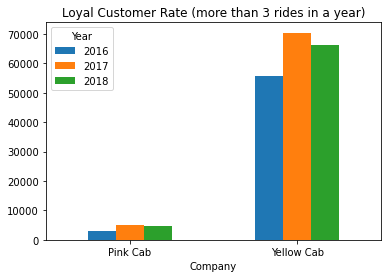

In [35]:
df_Re_3.plot.bar(title = "Loyal Customer Rate (more than 3 rides in a year)", rot=False);

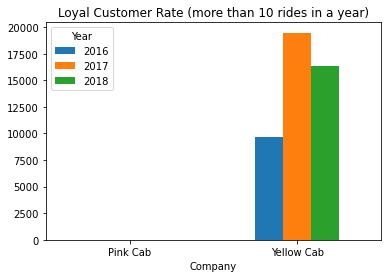

In [36]:
df_Re_10.plot.bar(title = "Loyal Customer Rate (more than 10 rides in a year)", rot=False);

<b> Customers of Pick cab company are not as loyal as that of Yellow cab </b>

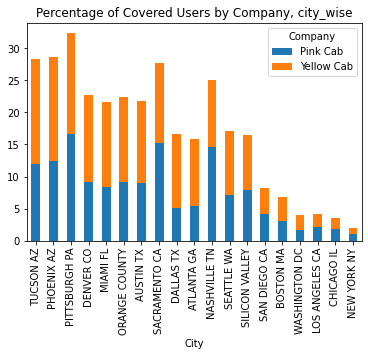

In [37]:
df3 = cab_data.groupby(by=["City", "Company"]).agg(no_customer=('Customer ID',
                                                                'nunique'),
                                                   no_users=('Users', 'max'))
df3["user_covered"] = round(100 * df3["no_customer"] / df3["no_users"], 2)
df3.drop(columns=["no_customer", "no_users"], inplace=True)
df3.unstack()["user_covered"].sort_values(
    'Yellow Cab', ascending=False).plot.bar(
        stacked=True,
        title='Percentage of Covered Users by Company, city_wise');

In [38]:
df3.unstack()[df3.unstack()['user_covered']["Pink Cab"]-df3.unstack()['user_covered']["Yellow Cab"]>0]

user_covered           
Company           Pink Cab Yellow Cab
City                                 
NASHVILLE TN         14.63      10.41
PITTSBURGH PA        16.58      15.76
SACRAMENTO CA        15.30      12.49
SAN DIEGO CA          4.16       4.12

Previously, it has been revealed that Pink company in above mentioned cities has high numbers of rides. Also, in these city, Pink company was able to covered more users that Yellow company.

<b> Trips at Holidays</b>

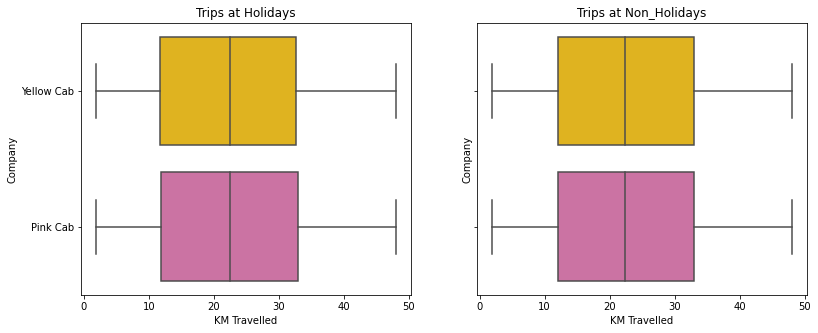

In [39]:
palette = [ '#ffc400', '#d965a4']
Holiday = cab_data[cab_data.Holiday == 1]
Non_Holiday = cab_data[cab_data.Holiday == 0]

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.boxplot(x = 'KM Travelled', y = 'Company', data = Holiday, palette = palette, 
        order = ['Pink Cab', 'Yellow Cab'], ax = ax[0]).\
set_title('Trips at Holidays');


sns.boxplot(x = 'KM Travelled', y = 'Company', data = Non_Holiday, palette = palette, ax = ax[1]).\
set_title('Trips at Non_Holidays');

plt.show()

When it comes to boxplot, there is no difference between Yellow and Pink Company in distance of travel at Holidays and Non_Holidays.

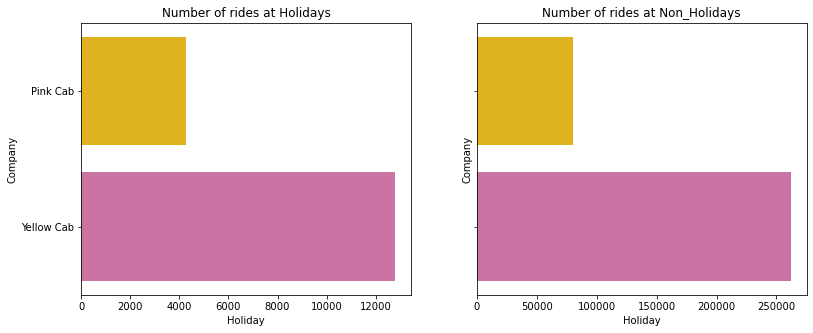

In [40]:
nonHo_rides=Non_Holiday.groupby(by=["Company"])["Holiday"].count().reset_index()
Ho_rides=Holiday.groupby(by=["Company"])["Holiday"].count().reset_index()

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.barplot(x = 'Holiday', y = 'Company', data = Ho_rides, palette = palette, 
            order = ['Pink Cab', 'Yellow Cab'], ax = ax[0]).\
set_title('Number of rides at Holidays');


sns.barplot(x = 'Holiday', y = 'Company', data = nonHo_rides, palette = palette, ax = ax[1]).\
set_title('Number of rides at Non_Holidays');


However, Yellow cab Co. has more rides at at both holidays and non_holidays than those of Pink Cab Co.

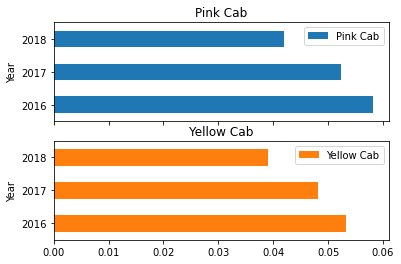

In [41]:
cab_data.groupby(by=["Company",'Year'])["Holiday"].mean().unstack("Company").plot.barh(subplots=True,stacked=True, rot=False);

It is interesting that the proportion of holiday's rides of Pink cab Company to non-holiday's ride is higher that that of Yellow cab Company. It can be concluded if Yellow Co. stops its services Pink Co. can be a good replacement for customers. 

### Correlation analysis (Hypothetical testing)

In [42]:
cab_data[[
    "KM Travelled", "Price Charged", "Cost of Trip", "Population", "Users",
    "Age", "Income (USD/Month)", "profit"
]].corr()

,KM Travelled,Price Charged,Cost of Trip,Population,Users,Age,Income (USD/Month),profit
KM Travelled,1.000000,0.835753,0.981851,-0.002311,-0.000432,-0.000405,-0.000554,0.462767
Price Charged,0.835753,1.000000,0.859811,0.326594,0.281056,-0.003135,0.003207,0.864155
Cost of Trip,0.981851,0.859811,1.000000,0.015115,0.023629,-0.000241,-0.000646,0.486058
Population,-0.002311,0.326594,0.015115,1.000000,0.915494,-0.009034,0.011886,0.544079
Users,-0.000432,0.281056,0.023629,0.915494,1.000000,-0.005941,0.010496,0.457748
Age,-0.000405,-0.003135,-0.000241,-0.009034,-0.005941,1.000000,0.003957,-0.005128
Income (USD/Month),-0.000554,0.003207,-0.000646,0.011886,0.010496,0.003957,1.000000,0.006126
profit,0.462767,0.864155,0.486058,0.544079,0.457748,-0.005128,0.006126,1.000000


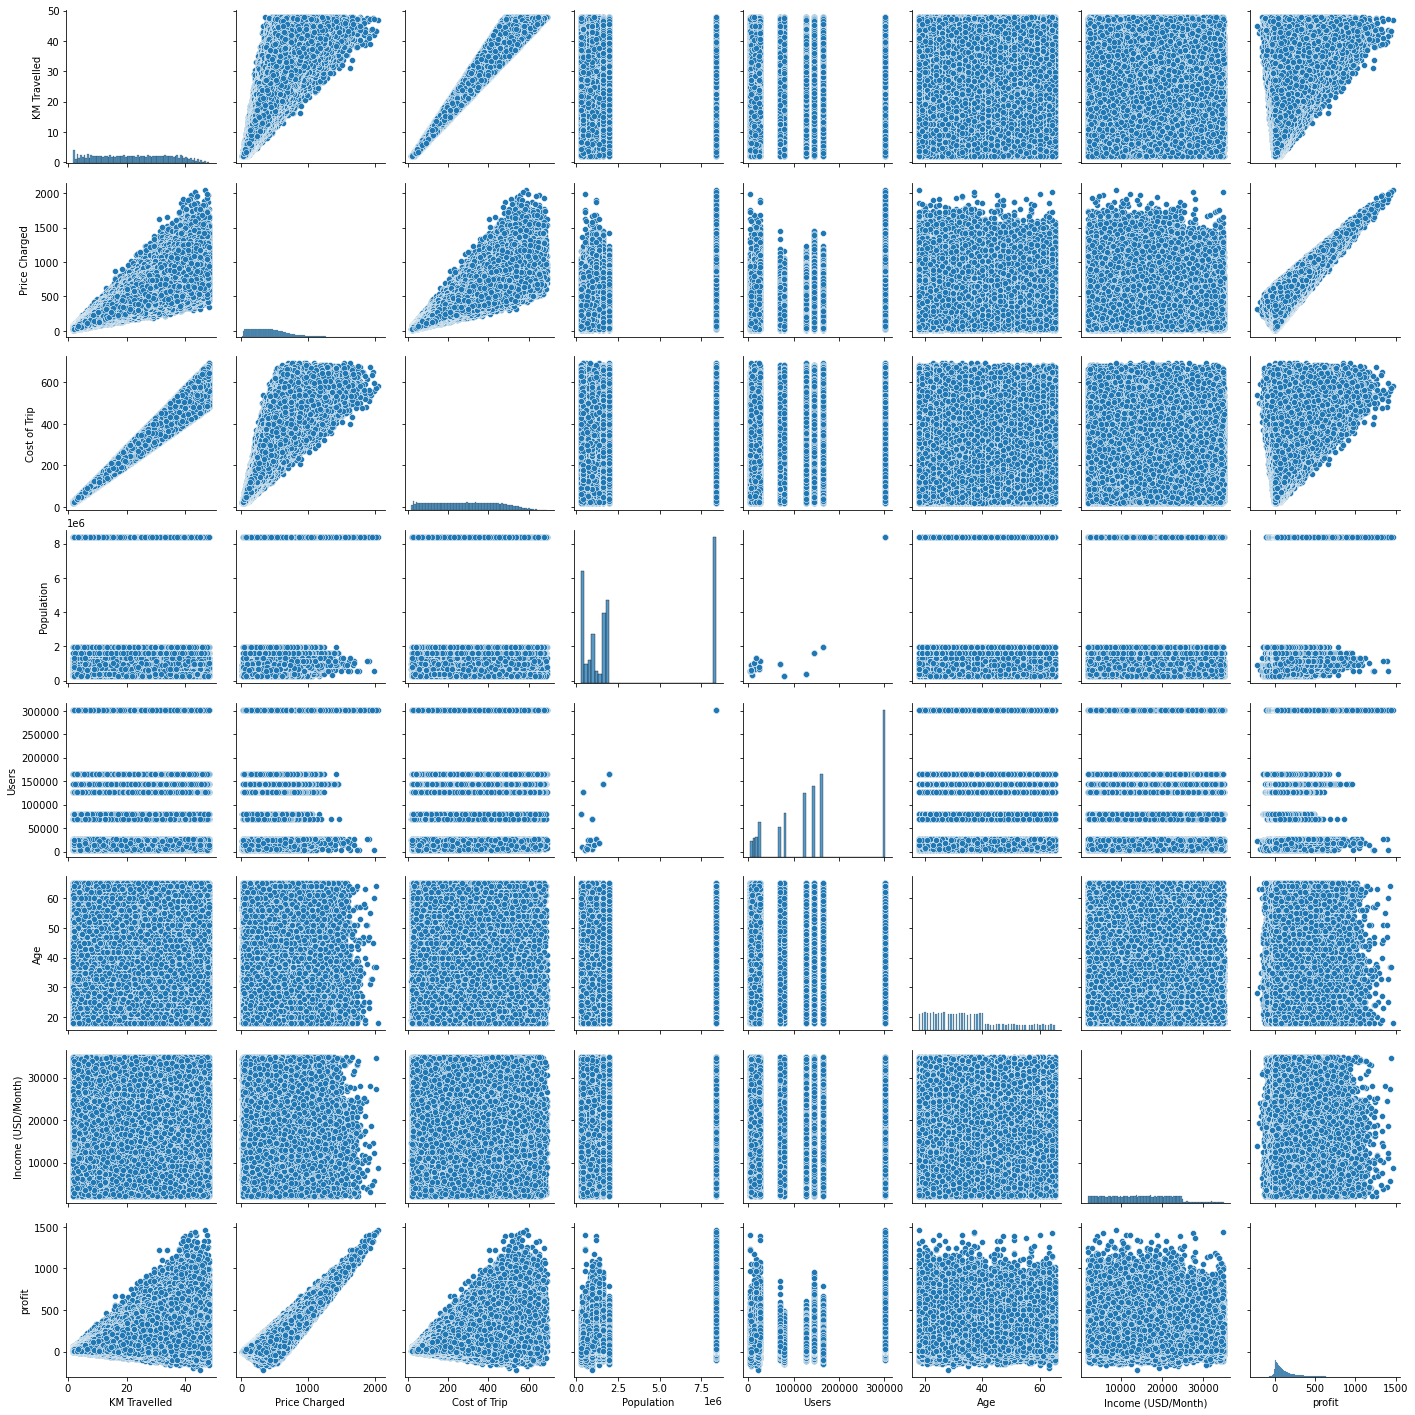

In [43]:
sns.pairplot(cab_data[[
    "KM Travelled", "Price Charged", "Cost of Trip", "Population", "Users",
    "Age", "Income (USD/Month)", "profit"
]])
plt.show()

The correlation depicts that KM Travelled,	Price Charged , Cost of Trip are correlated with each other. As it is clear, profit is supposed to be correlated with all previous features. 

The important conclusion is no correlation among population, users, income, and age.

<big><b>Let's test some above hypotheses.</b></big>  

Hypothesis 1:


$H_0$  : There is no difference in Age of customers.

$H_1$  : There is difference in Age of customers.



According to the descriptive analysis, the mean of data is the 35 year old, so I select 35 for this test.

In [45]:
#Pink cab Co.
from scipy import stats
a = cab_data[(cab_data.Age <= 35)&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data.Age > 35)&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in age for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in age for Pink cabs.')

P value is  0.07624296147771467
H0 cannot be rejected, so there is no difference in age for Pink cabs.


In [46]:
#Yellow cab Co.
a = cab_data[(cab_data.Age <= 35)&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data.Age > 35)&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in age for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in age for Yellow cabs.')

P value is  0.8131224357107243
H0 cannot be rejected, so there is no difference in age for Yellow cabs.


Hypothesis 2:

$H_0$: There is no difference in Income of customers.

$H_1$: There is difference in Income of customers.

According to the descriptive analysis, the mean of Income is 15015.

In [47]:
#Pink cab Co.
a = cab_data[(cab_data["Income (USD/Month)"] <= 15015)&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data["Income (USD/Month)"] > 15015)&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in income for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in income for Pink cabs.')

P value is  0.03818361802319076
H1 can be accepted, so there is difference in income for Pink cabs.


In [48]:
#Yellow cab Co.
a = cab_data[(cab_data["Income (USD/Month)"]<= 15015)&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data["Income (USD/Month)"] > 15015)&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in income for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in income for Yellow cabs.')

P value is  3.983387219671155e-10
H1 can be accepted, so there is difference in income for Yellow cabs.



Hypothesis 3:

$H_0$  : There is no difference in Gender.

$H_1$ : There is difference in Gender.


In [49]:
#Pink cab Co.
a = cab_data[(cab_data.Gender == "Male")&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data.Gender == "Female")&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Pink cabs.')

P value is  0.117985940330773
H0 cannot be rejected, so there is no difference in gender for Pink cabs.


In [50]:
#Yellow cab Co.
a = cab_data[(cab_data.Gender == "Male")&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data.Gender == "Female")&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Yellow cabs.')

P value is  8.72127175426404e-25
H1 can be accepted, so there is difference in gender for Yellow cabs.


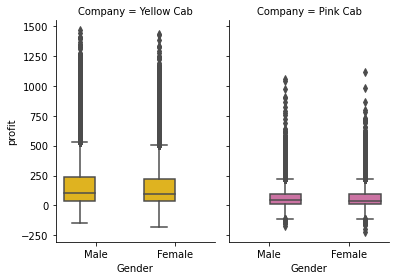

In [51]:
ax = sns.catplot(x="Gender",
                 y="profit",
                 hue="Company",
                 col="Company",
                 data=cab_data,
                 kind="box",
                 height=4,
                 aspect=.7,
                 palette=palette)

Hypothesis 4:

$H_0$ : There is no difference in Payment_Mode.

$H_1$ : There is difference in Payment_Mode.


In [52]:
#Pink cab Co.
a = cab_data[(cab_data.Payment_Mode == "Cash")&(cab_data.Company=='Pink Cab')]["profit"]

b = cab_data[(cab_data.Payment_Mode == "Card")&(cab_data.Company=='Pink Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Pink cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Pink cabs.')

P value is  0.7815101401525516
H0 cannot be rejected, so there is no difference in gender for Pink cabs.


In [53]:
#Yellow cab Co.
a = cab_data[(cab_data.Payment_Mode == "Cash")&(cab_data.Company=='Yellow Cab')]["profit"]

b = cab_data[(cab_data.Payment_Mode == "Card")&(cab_data.Company=='Yellow Cab')]["profit"]


_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('H1 can be accepted, so there is difference in gender for Yellow cabs.')
else:
    print('H0 cannot be rejected, so there is no difference in gender for Yellow cabs.')

P value is  0.2834441108574781
H0 cannot be rejected, so there is no difference in gender for Yellow cabs.


## Profit

Since the profit of companies plays vital role in a inversment firm decision, in this section, I am looking for the relationship between Profit and other features.

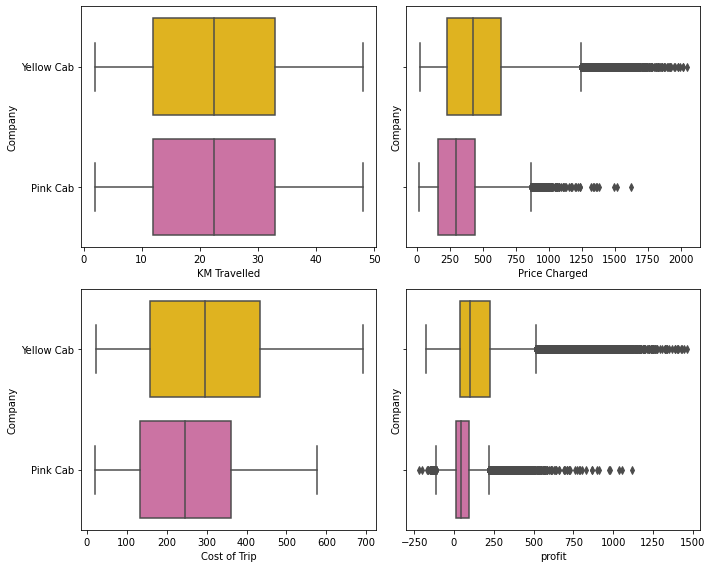

In [54]:
palette = [ '#ffc400', '#d965a4']

fig, axes = plt.subplots(2,2, figsize = (10,8), sharey = True)

for col, ax in zip(['KM Travelled', "Price Charged","Cost of Trip", 'profit'], 
                   axes.flatten()):
    
    sns.boxplot(x = col, data = cab_data, y = 'Company', ax = ax, palette = palette);
    plt.tight_layout();

The above plots illustrate:

1) Travel of trip has nothing to do with a difference in profit, and both companies have trips with same distibution.

2) Both companies have loss in their recored, which should be invesitgated, according to the Q1 and outlier of profit boxplot.

3) In overall, the costs of the trip of Yellow cab Co. is higher those of its rival affecting the profit.

4) The boxplot of Charges (amount of payment) is similar to that of profit, which means that it is a key feature in profit. It can be assumed that they charge the customer with additional costs like a luxury cars or/and special services, including children car seats ans so on, which can be named as "Premium". |


<div class="alert alert-warning" role="alert">

The outliers are actually the Premium Trip. Therefore, the outliers should not be deleted.
    
</div>

<big><b>Loss</b></big>

In [55]:
loss = cab_data.query("profit <= 0")
loss

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,profit,Year
98,10000356,2016-01-01,Pink Cab,SEATTLE WA,14.95,171.47,171.9250,671238,25063,38635,Card,Male,31,24682,1,-0.4550,2016
108,10000066,2016-01-01,Pink Cab,DALLAS TX,13.13,122.42,149.6820,942908,22157,25155,Card,Male,27,10997,1,-27.2620,2016
109,10000067,2016-01-01,Pink Cab,DALLAS TX,33.32,308.58,386.5120,942908,22157,25247,Cash,Male,26,24178,1,-77.9320,2016
113,10000070,2016-01-01,Pink Cab,DENVER CO,7.02,61.30,82.8360,754233,12421,30718,Cash,Male,52,20255,1,-21.5360,2016
422,10000378,2016-01-04,Pink Cab,WASHINGTON DC,29.75,295.60,348.0750,418859,127001,51246,Card,Male,61,2035,0,-52.4750,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359537,10437817,2018-12-30,Yellow Cab,BOSTON MA,38.85,504.11,540.7920,248968,80021,59494,Cash,Female,35,17699,0,-36.6820,2018
359538,10437814,2018-12-30,Yellow Cab,BOSTON MA,17.10,238.07,240.0840,248968,80021,59185,Card,Female,42,11396,0,-2.0140,2018
359551,10438032,2018-12-30,Yellow Cab,CHICAGO IL,37.00,431.18,532.8000,1955130,164468,3024,Cash,Male,21,25570,0,-101.6200,2018
359553,10438024,2018-12-30,Yellow Cab,CHICAGO IL,20.88,283.88,298.1664,1955130,164468,5782,Cash,Male,23,24334,0,-14.2864,2018


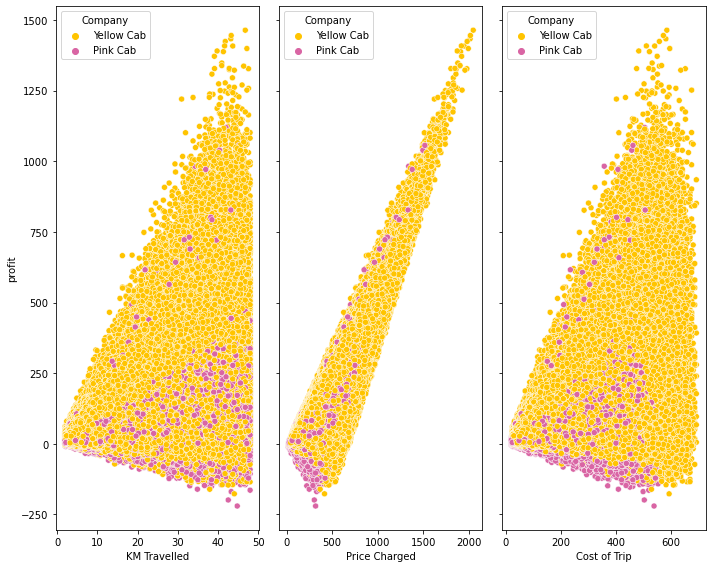

In [56]:
palette = [ '#ffc400', '#d965a4']

fig, axes = plt.subplots(1,3, figsize = (10,8), sharey = True)

for col, ax in zip(['KM Travelled', "Price Charged","Cost of Trip"], 
                   axes.flatten()):
    
    sns.scatterplot(x = col, data = cab_data, y= 'profit', hue = 'Company', ax = ax, palette = palette);
    plt.tight_layout();

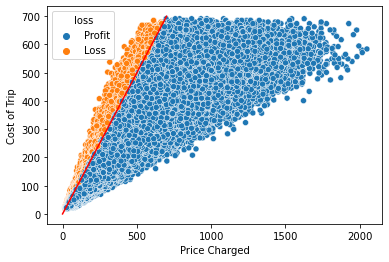

In [57]:
cab_data["loss"]=["Profit" if x > 0 else "Loss" for x in cab_data.profit]
sns.scatterplot(x = "Price Charged", y= 'Cost of Trip', data = cab_data, hue = 'loss');
X_plot = np.linspace(0, 700, 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.show()

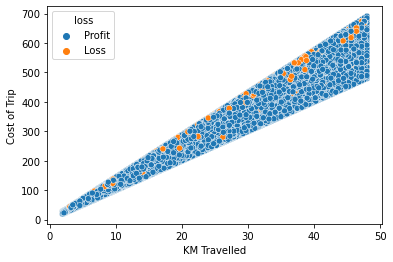

In [58]:
cab_data["loss"]=["Profit" if x > 0 else "Loss" for x in cab_data.profit]
sns.scatterplot(x = "KM Travelled", y= 'Cost of Trip', data = cab_data, hue = 'loss');


At any trip cost and milage, they may charge customers less than the acutal cost. However, the scatter plot of loss at high number of milage and cost is more dense than the low numbers.

<b>Lets look at the impact of city, holiday, and seasonality on loss.</b>

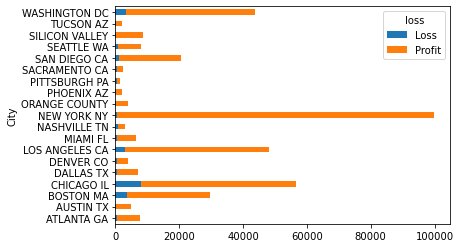

In [59]:
cab_data.groupby(["City","loss"]).size().unstack().plot.barh(stacked=True);

In [60]:
a= cab_data.groupby(["City","loss"]).size().unstack().reset_index()
a["loss fraction"]=round(100*a.Loss/(a.Loss+a.Profit),1)
a.sort_values("loss fraction", axis=0, ascending =False)

loss,City,Loss,Profit,loss fraction
12,PITTSBURGH PA,336,978,25.6
8,NASHVILLE TN,694,2317,23.0
13,SACRAMENTO CA,519,1850,21.9
17,TUCSON AZ,277,1654,14.3
3,CHICAGO IL,7909,48747,14.0
5,DENVER CO,499,3326,13.0
2,BOSTON MA,3749,25958,12.6
11,PHOENIX AZ,249,1818,12.0
15,SEATTLE WA,827,7172,10.3
4,DALLAS TX,543,6480,7.7


70% of loss happens in three cities: PITTSBURGH PA, NASHVILLE TN, SACRAMENTO CA.

New york has the lowest loss fraction.

I can draw a conclusion that one of the factor to set the "Premium" is city. 

In [61]:
a = pd.crosstab(cab_data["loss"],
                cab_data["Holiday"]).reset_index().rename(columns={
                    0: "Non_Holidays",
                    1: "Holidays"
                })
a

Holiday,loss,Non_Holidays,Holidays
0,Loss,23607,1237
1,Profit,318884,15837


Let test Holidays and Loss are dependant by Pearson’s Chi-Square Test

A test of independence assesses whether unpaired observations on two variables,
expressed in a contingency table , are independent of each other.

$H_0$: Holidays and Loss are independent

$H_1$: Holidays and Loss are not independent

In [62]:
from scipy.stats import chi2_contingency

b=[a.Non_Holidays.values,a.Holidays.values]
stat, p, dof, expected = chi2_contingency(b)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Holidays and Loss are not independent (reject H0)')
else:
    print('Holidays and Loss are independent (H0 holds true)')

p value is 0.07916900333886781
Holidays and Loss are independent (H0 holds true)


/var/folders/qx/bl7lfgd95nv5l72lrc8lqfb40000gp/T/ipykernel_62399/2746737500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss["month"] = pd.to_datetime(loss.loc[:,'Date of Travel']).dt.strftime('%Y-%m')


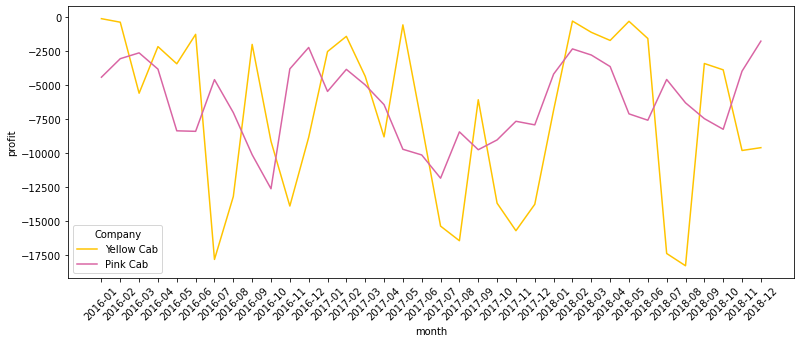

In [63]:
loss["month"] = pd.to_datetime(loss.loc[:,'Date of Travel']).dt.strftime('%Y-%m')
 
loss_sum = loss.groupby(['month', 'Company']).sum().reset_index()

plt.figure(figsize = (13,5))

ax = sns.lineplot(x = 'month', y = 'profit', data = loss_sum, hue = 'Company', 
             hue_order = ['Yellow Cab', 'Pink Cab'], palette = palette)
plt.xticks(rotation=45);

The plot shows seasonality in loss. We have sharp seasonality on June,July, and Octobor for Yellow cab Company. Also, for Pink Co., Loss increases during the June to October. 

<big><b>Premium</b></big>

Let's define Premium feature by $Q3+1.5 \times IQR$

The 3rd quantile of "Price Charged" is 583.65, the 1st one is 206.43. 

IQR = 377.22 

$Q3+1.5 \times IQR$ = 1149.48

In [64]:
cab_data["Premium"]=[1 if x > 1149.49 else 0 for x in cab_data["Price Charged"]]


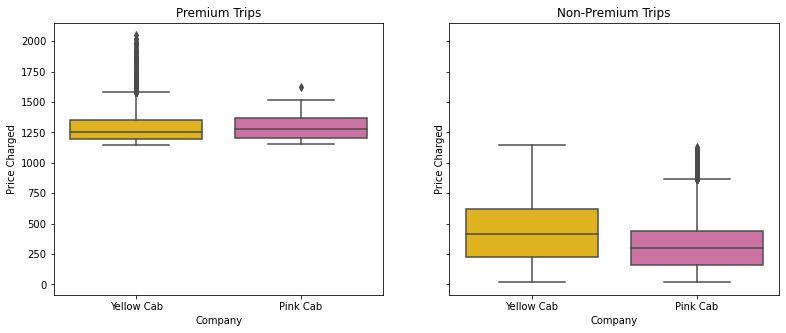

In [65]:
premium = cab_data.query('Premium == 1')
non_premium = cab_data.query('Premium == 0')

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.boxplot(y = 'Price Charged', x = 'Company', data = premium, palette = palette, 
            order = [ 'Yellow Cab','Pink Cab'], ax = ax[0]).\
set_title('Premium Trips');


sns.boxplot(y = 'Price Charged', x = 'Company', data = non_premium, palette = palette, ax = ax[1]).\
set_title('Non-Premium Trips');

Prices that has been charged so far in Premium option have a lot of outliers in Yellow Company. However, for Non_Premium trips, it is Pink Co. that has a great number of outliers.


In [66]:
a= cab_data.groupby(["Premium", "Company"])["profit"].sum().unstack().reset_index()
a

Company,Premium,Pink Cab,Yellow Cab
0,0,5292700.969,3.954755e+07
1,1,15445.956,4.495303e+06


In [67]:
from scipy.stats import chi2_contingency

b=[a["Pink Cab"].values,a["Yellow Cab"].values]
stat, p, dof, expected = chi2_contingency(b)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Premium and Profit are not independent (reject H0)')
else:
    print('Premium and Profit are independent (H0 holds true)')

p value is 0.0
Premium and Profit are not independent (reject H0)


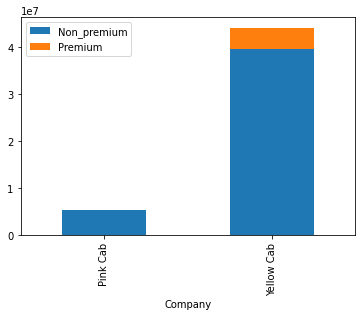

In [68]:
a= a.drop("Premium",axis=1).rename( index={0: 'Non_premium', 1:"Premium"}).round(0)
a.T.plot.bar(stacked=True);

The profit from the Premium is not high fraction of total profit. 


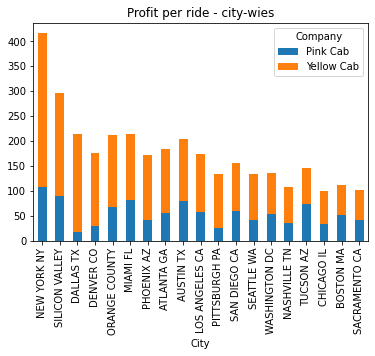

In [69]:
def divide_two_cols(df_sub):
    df_sub['divs'] = df_sub['profit'].sum() / float(df_sub['Customer ID'].count())
    return df_sub

a=cab_data.groupby(['City', "Company"]).apply(divide_two_cols)
pr1=a.groupby(['City', "Company"])["divs"].max()

pr1.unstack().sort_values(
    'Yellow Cab', ascending=False).plot.bar(stacked=True, title= "Profit per ride - city-wies");

<AxesSubplot:title={'center':'Average Profit Per Kilo Meter'}, xlabel='Year'>

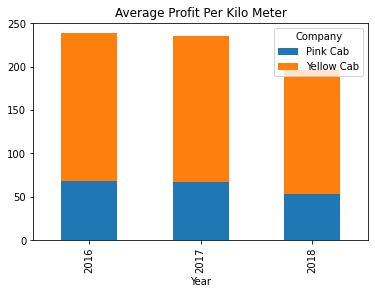

In [70]:
pr2 = cab_data.groupby(['Year', "Company"])["profit"].mean()

pr2.unstack().sort_values('Yellow Cab', ascending=False).plot.bar(
    stacked=True, title="Average Profit Per Kilo Meter")

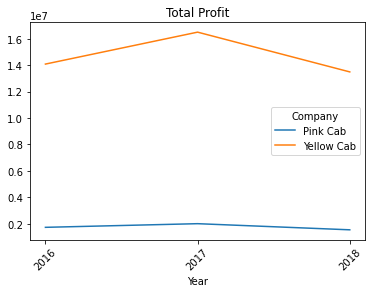

In [71]:
pr3 = cab_data.groupby(['Year', "Company"])["profit"].sum()
pr3.unstack().plot.line(stacked=False, title="Total Profit", rot=45,xticks=[2016,2017,2018]);


In [72]:
a.groupby("Company").agg({
    'profit': "sum",
    'Customer ID': "count"
}).round(2).rename(columns={"Customer ID": "Total Rides"})

,profit,Total Rides
Company,,
Pink Cab,5308146.92,84739
Yellow Cab,44042849.11,274826


<b>Profit VS Income</b>

Lets classify customers in different groups by their income. According to the article https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx, I set these classes:

- Low Income: under 3500 USD per month

- Middle Income: between 3500 and 10500 USD per month

- High Income: above 10500 USD per month

In [73]:
bins = [0, 3500, 10500, 35000]
labels = ['low', 'middle', 'high']

cab_data['income_class'] = pd.cut(cab_data["Income (USD/Month)"],
                                  bins=bins,
                                  labels=labels)

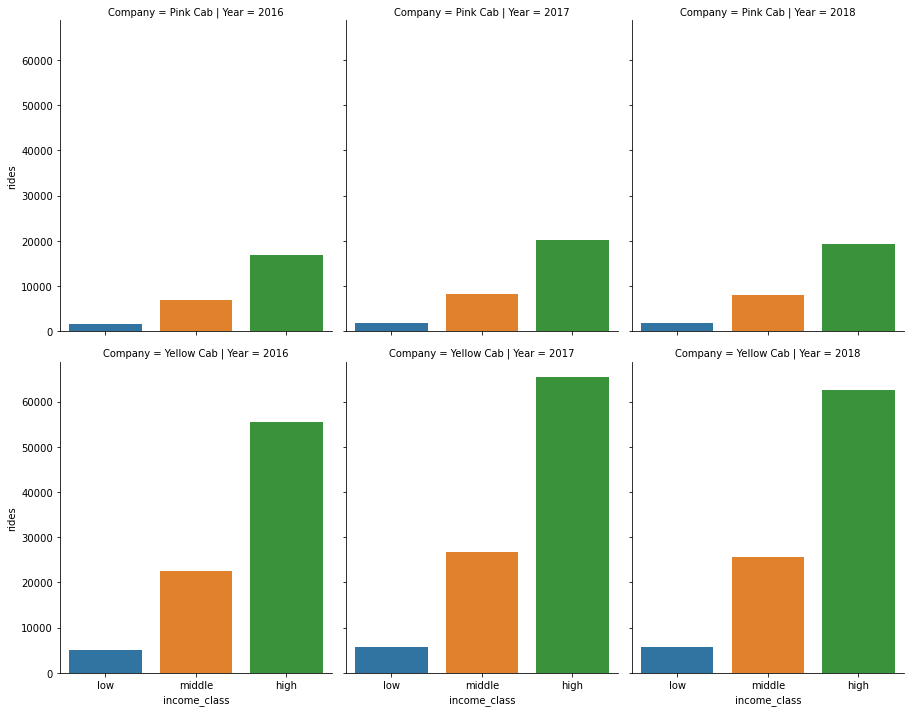

In [74]:
income_rides = cab_data.groupby(['Year', 'Company', 'income_class']).size().reset_index().\
                                                                rename(columns = {0:'rides'})

sns.catplot(x = 'income_class', y = 'rides', row = 'Company', col = 'Year', data = income_rides, 
           kind = 'bar', aspect = 0.85);

High income customers have higher number of rides, regardless of companies.

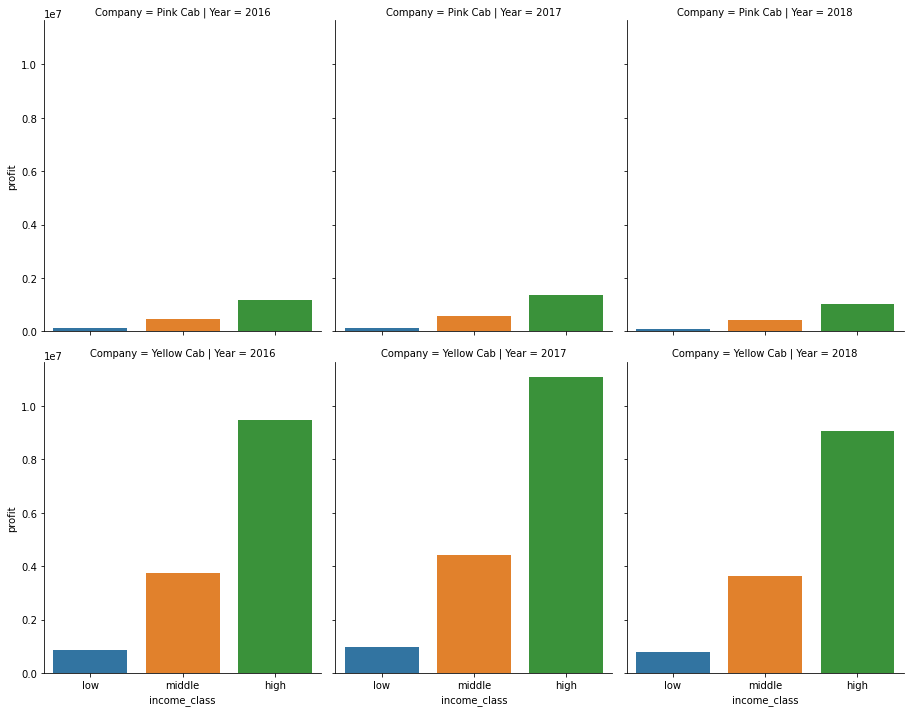

In [75]:
income_profit = cab_data.groupby(['Year', 'Company', 'income_class'])["profit"].sum().reset_index().\
                                                                rename(columns = {0:'profit'})

sns.catplot(x = 'income_class', y = 'profit', row = 'Company', col = 'Year', data = income_profit, 
           kind = 'bar', aspect = 0.85);

As it was clear, the plot shows that high income family spend more money on cab company. Moreover, Yellow cab Company benefits from high income cutomers more than its rival.


## Recommendations

I have investigated in both the cab companies on following points; by doing so, I found Yellow cab better than Pink cab:

- Customers covarage : Yellow cab was able to covered more customers in 25 cities, compared to Pink can which could reach higher customers in 4 cities.

- Customer Loyalty: I evaluated cutomers' loyality by repeat 3 rides and  10 rides with the same cab company, which shows that Yellow cab is doing way better than Pink cab in both these segments.

- Customer return: Customers prefer to reuse Yellow cab. Yellow cab ride per customer = 6.9, Pink cab ride per customer = 2.6 

- Income wise Reach : Yellow cab offer services to 3 income classes, compared to Pink cab that is weak in absorbing low income family.


All in all , I recommend Yellow cab for investment to XYZ company.